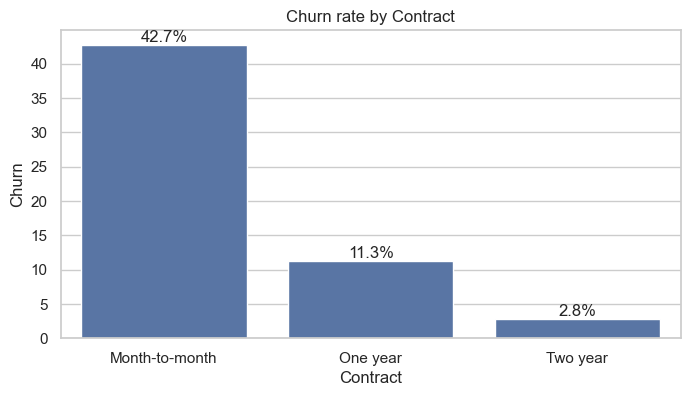

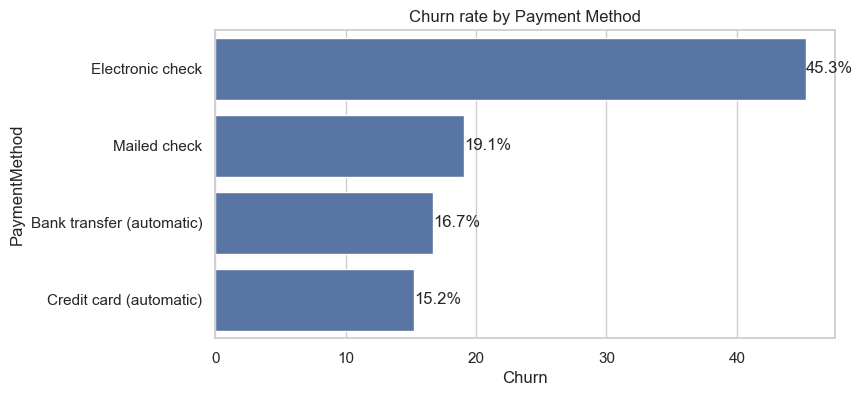

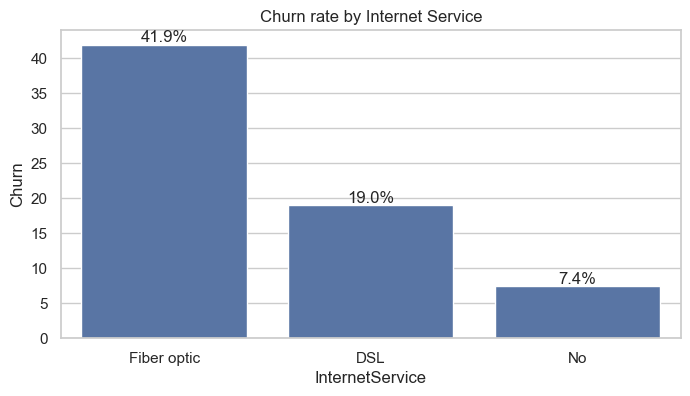

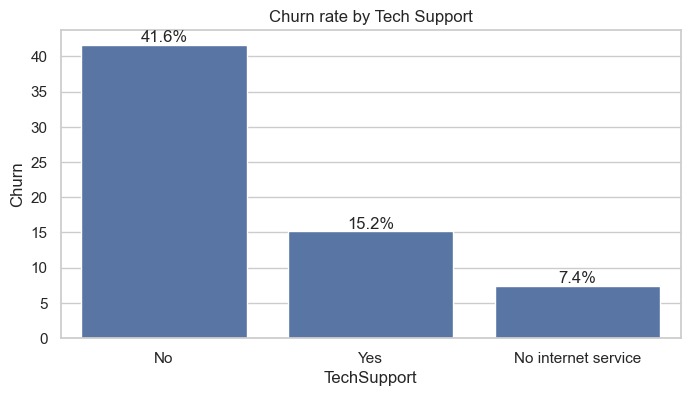

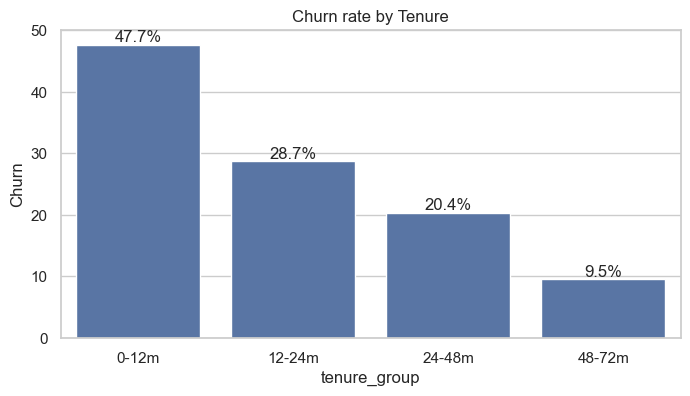

In [10]:
# analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# C·∫•u h√¨nh hi·ªÉn th·ªã
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# 1. Load dataset
df = pd.read_csv("Telco-Customer-Churn-EDA.csv")


# ===============================
# Helper function ƒë·ªÉ annotate bar
# ===============================
def add_percent_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# ===============================
# Churn theo Contract
# ===============================
contract_churn = df.groupby("Contract")["Churn"].mean().reset_index()
contract_churn["Churn"] *= 100

ax = sns.barplot(x="Contract", y="Churn", 
                 data=contract_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Contract")
add_percent_labels(ax)
plt.savefig("churn_by_contract.png", dpi=300, bbox_inches="tight")
plt.show()


# ===============================
# Churn theo PaymentMethod
# ===============================
def add_percent_labels(ax, is_horizontal=False):
    for p in ax.patches:
        if is_horizontal:
            # Barplot ngang: d√πng width
            ax.annotate(f'{p.get_width():.1f}%',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center')
        else:
            # Barplot d·ªçc: d√πng height
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

payment_churn = df.groupby("PaymentMethod")["Churn"].mean().reset_index()
payment_churn["Churn"] *= 100

ax = sns.barplot(y="PaymentMethod", x="Churn", 
                 data=payment_churn.sort_values("Churn", ascending=False))

plt.title("Churn rate by Payment Method")
add_percent_labels(ax, is_horizontal=True)
plt.savefig("churn_paymentmethod.png", dpi=300, bbox_inches="tight")
plt.show()


# ===============================
# Churn theo InternetService
# ===============================
internet_churn = df.groupby("InternetService")["Churn"].mean().reset_index()
internet_churn["Churn"] *= 100

ax = sns.barplot(x="InternetService", y="Churn", 
                 data=internet_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Internet Service")
add_percent_labels(ax)
plt.savefig("churn_internetservice.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================
# Churn theo TechSupport
# ===============================
tech_churn = df.groupby("TechSupport")["Churn"].mean().reset_index()
tech_churn["Churn"] *= 100

ax = sns.barplot(x="TechSupport", y="Churn", 
                 data=tech_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Tech Support")
add_percent_labels(ax)
plt.savefig("churn_techsupport.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================
# Churn theo Tenure bins
# ===============================
df["tenure_group"] = pd.cut(df["tenure"], 
                            bins=[0,12,24,48,72], 
                            labels=["0-12m","12-24m","24-48m","48-72m"])

tenure_churn = df.groupby("tenure_group", observed=True)["Churn"].mean().reset_index()

tenure_churn["Churn"] *= 100

ax = sns.barplot(x="tenure_group", y="Churn", 
                 data=tenure_churn)
plt.title("Churn rate by Tenure")
add_percent_labels(ax)
plt.savefig("churn_by_tenure.png", dpi=300, bbox_inches="tight")
plt.show()




üìä Insight t·ª´ ph√¢n t√≠ch EDA

Contract

Kh√°ch h√†ng d√πng Month-to-month c√≥ churn rate 42.7% (cao nh·∫•t).

Ng∆∞·ª£c l·∫°i, h·ª£p ƒë·ªìng d√†i h·∫°n (2 nƒÉm) c√≥ churn r·∫•t th·∫•p (2.8%).
üëâ H·ª£p ƒë·ªìng ng·∫Øn h·∫°n = r·ªßi ro cao ‚Üí c·∫ßn ch√≠nh s√°ch gi·ªØ ch√¢n.

Payment Method

Electronic check c√≥ churn rate cao nh·∫•t (45.3%).

C√°c h√¨nh th·ª©c thanh to√°n t·ª± ƒë·ªông (Bank transfer, Credit card) c√≥ churn th·∫•p (~15‚Äì17%).
üëâ Kh√°ch h√†ng thanh to√°n th·ªß c√¥ng d·ªÖ r·ªùi b·ªè h∆°n.

Internet Service

Fiber optic c√≥ churn rate cao (41.9%) so v·ªõi DSL (18.9%).
üëâ C√≥ th·ªÉ do ch·∫•t l∆∞·ª£ng d·ªãch v·ª• ho·∫∑c gi√° c·∫£ Fiber optic khi·∫øn kh√°ch h√†ng kh√¥ng h√†i l√≤ng.

Tech Support

Kh√°ch h√†ng kh√¥ng c√≥ h·ªó tr·ª£ k·ªπ thu·∫≠t c√≥ churn rate cao h∆°n ƒë√°ng k·ªÉ.
üëâ D·ªãch v·ª• h·ªó tr·ª£ k·ªπ thu·∫≠t ƒë√≥ng vai tr√≤ quan tr·ªçng trong gi·ªØ ch√¢n kh√°ch h√†ng.

Tenure (th·ªùi gian g·∫Øn b√≥)

Kh√°ch h√†ng m·ªõi (0‚Äì12 th√°ng) churn r·∫•t cao.

C√†ng g·∫Øn b√≥ l√¢u, churn rate c√†ng gi·∫£m.
üëâ Kh√°ch h√†ng m·ªõi l√† nh√≥m r·ªßi ro ‚Üí c·∫ßn t·∫≠p trung v√†o tr·∫£i nghi·ªám ban ƒë·∫ßu.